In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# reading the data from the disk and display the head of dataframe
df = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('Test_data.csv')
df.head()

,Label,Text
0,CLOS_DISC,Closing DisclosureThis form is a statement of ...
1,CLOS_DISC,Closing Cost DetailsBorrower-PaidSeller-PaldLo...
2,CLOS_DISC,Calculating Cash to CloseUse this table to see...
3,CLOS_DISC,Additiona Information About This LoanLoan Disc...
4,CLOS_DISC,Loan CalculationsOther DisclosuresTotal of Pay...


In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16130 entries, 0 to 16129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   16130 non-null  object
 1   Text    16130 non-null  object
dtypes: object(2)
memory usage: 252.2+ KB


* There are not missing values and total 16130 records

In [4]:
print('Total unique labels are {}'.format(df.Label.nunique()))
df.Label.unique()

Total unique labels are 56


array(['CLOS_DISC', 'NOTE', 'MORTGAGE', 'WARRANTY_DEED', 'WIRING_INST',
       'CHAIN_TITLE', 'TITLE', 'Notice of Ad Valorem Tax', 'CPL',
       'Survey', 'Policy Endorsement', 'ESCROW', 'QM_BREAKDOWN',
       'HOMEOWNERSHIP_COUNSELING_ORG_LIST',
       'ACK_HOMEOWNERSHIP_COUNSELING_ORG_LIST', 'FORM1003', 'APPROVAL',
       'LOCK_CONFORMATION', 'AUS-DU', 'CREDIT_REPORT', 'VERBAL_VOE',
       'APPRAISAL', 'LOAN_EST', 'STEERING', 'APPRAISAL_REPORT_INVOICE',
       'Survey Invoice', 'Third Party Processing Invoice', 'HOI Invoice',
       'CREDIT_INQUIRY', 'PATRIOT', 'FORM4506-T',
       'BUSSINESS_ARRANGEMENT_DISC_STATEMENT', 'FLOOD_INSURANCE', 'FLOOD',
       'CONSENT_AND_INTENT_TO_PROCEED',
       'APPRAISAL_DELIVERY_WAIVER/CONSENT_AND_INTENT_TO_PROCEED',
       'Credit Inquiry', 'EQUAL_CREDIT_OPPURTUNITY_ACT', 'Chain of Title',
       'Loan Approval', 'PURCHASE_CONTRACT', 'PURCHASE_CONTRACT_ADDENDUM',
       'COC', 'HOI', 'PURCHASE_CONTRACT_EXTENSION_ADDENDUM',
       'APPRAISAL_DELIVE

* There are 56 unique classes. Machine leanring algorithm understand only numerical values so Now we need to represent each classes as number 

In [5]:
# Creating a new column in dataframe for label id
label_list = df.Label.factorize()[1]
df['label_id'] = df.Label.factorize()[0]
df.head()

,Label,Text,label_id
0,CLOS_DISC,Closing DisclosureThis form is a statement of ...,0
1,CLOS_DISC,Closing Cost DetailsBorrower-PaidSeller-PaldLo...,0
2,CLOS_DISC,Calculating Cash to CloseUse this table to see...,0
3,CLOS_DISC,Additiona Information About This LoanLoan Disc...,0
4,CLOS_DISC,Loan CalculationsOther DisclosuresTotal of Pay...,0


In [6]:
#category_id_df = df2[['Product', 'category_id']].drop_duplicates()
label_id_df = df[['Label', 'label_id']].drop_duplicates()

#Dictionaries for future use
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id','Label']].values)

* In below bar chart showing the number of records per label

In [7]:
def plot():
    fig = plt.figure(figsize=(10,10))
    df.groupby('Label').Text.count().sort_values().plot.barh(ylim =0, title= 'Number of records per label\n')
    plt.xlabel('Number of records.')
    

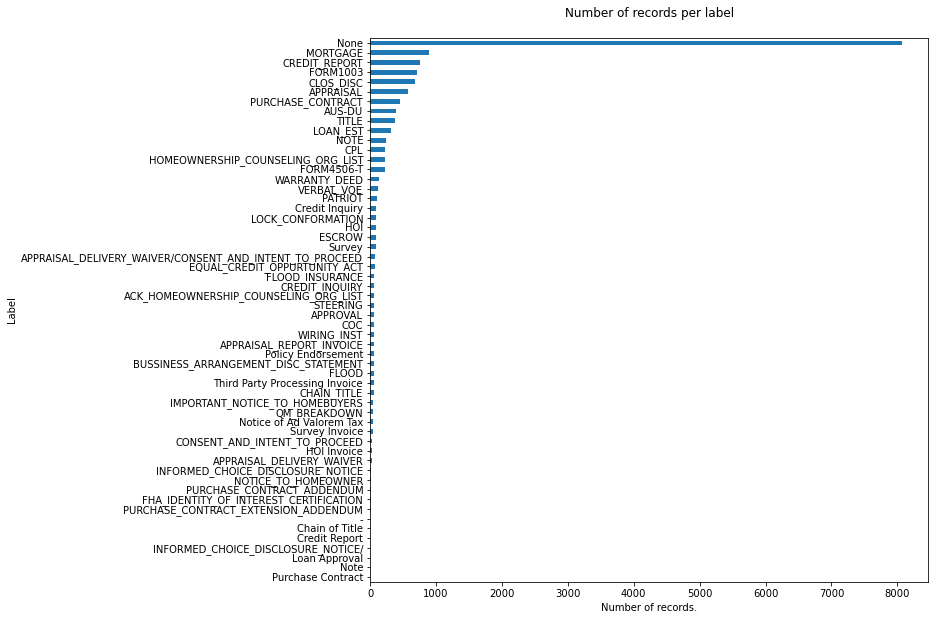

In [8]:
plot()

### Text-Preprocessing

In [9]:
# create a object of term-frequency, inverse document frequency 
tfidf = TfidfVectorizer(min_df = 5, lowercase = True,max_features= 21, ngram_range=(1,2), stop_words = 'english', sublinear_tf = True)

# transform each lebel into vector
feature = tfidf.fit_transform(df.Text).toarray()

### Model selection

In [10]:
# cross validation score
labels = df.label_id
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    XGBClassifier(),
    LinearSVC(),
    MultinomialNB()
]

cross_value_scored = []
for model in models:
    model_name = model.__class__.__name__
    accuracies= cross_val_score(model, feature, labels, scoring = 'accuracy', cv = 5)
    for accuracy in accuracies:
        cross_value_scored.append((model_name, accuracy))
        

/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:51:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:51:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [11]:
# make a dataframe of cross_val_scor
df_cv = pd.DataFrame(cross_value_scored, columns =['model_name', 'accuracy'])
acc = pd.concat([df_cv.groupby('model_name').accuracy.mean(),df_cv.groupby('model_name').accuracy.std()], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.747861,0.004924
MultinomialNB,0.538252,0.001649
RandomForestClassifier,0.648729,0.004062
XGBClassifier,0.859392,0.006740


In [12]:
# hyperparameter tunning of XGBClassifier
clf_xgb = XGBClassifier()
# hypermeter setting
param_dist = {'n_estimators': np.random.randint(150, 500,100),
              'learning_rate': [0.01,0.1,0.2,0.3,0.4, 0.59],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 2, 3, 4]
             }

kfold_5 = KFold(shuffle = True, n_splits = 5)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, 
                         scoring = 'roc_auc', 
                         verbose = 3, 
                         n_jobs = -1)

#### **NOTE: Hyperparameter tunning time consuming so I am skiping this step**

In [13]:
#clf.fit(feature, labels)

In [16]:
# spliting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(feature, labels, random_state=0, test_size=0.2)

In [17]:
# creating and fiting the instance of the xgb classifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

/home/sunil/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred = xgb.predict(x_test)
print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       140
           1       0.95      0.81      0.87        47
           2       0.96      0.94      0.95       180
           3       0.93      0.58      0.72        24
           4       0.89      0.50      0.64        16
           5       0.60      0.30      0.40        10
           6       0.90      0.70      0.79        88
           7       0.88      0.78      0.82         9
           8       0.91      0.91      0.91        47
           9       0.71      0.42      0.53        12
          10       1.00      1.00      1.00         8
          11       0.94      0.75      0.83        20
          12       1.00      0.89      0.94         9
          13       0.98      0.91      0.94        53
          14       1.00      0.43      0.60         7
          15       0.89      0.93      0.91       128
          16       1.00      0.50      0.67        10
     

/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunil/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix.')

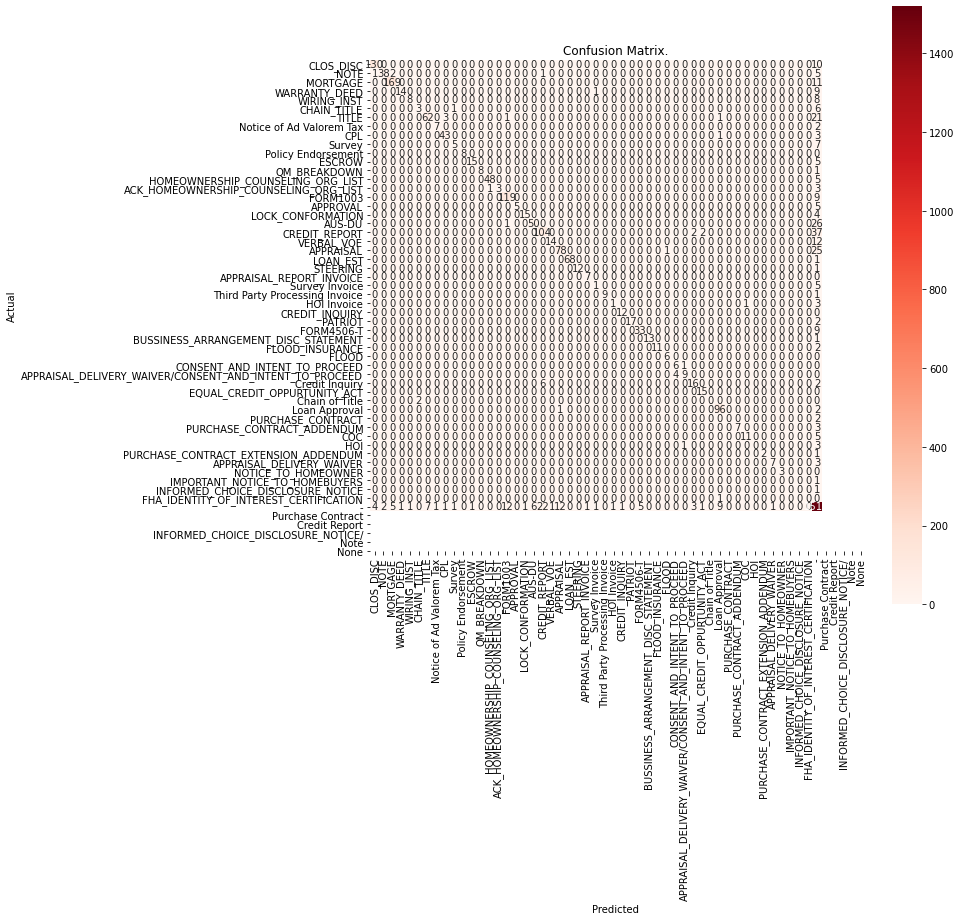

In [19]:
# confusion_matrx 
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(conf_matrix, annot=True, cmap = 'Reds', fmt='d',xticklabels = label_id_df.Label.values,
           yticklabels = label_id_df.Label.values,square = True )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix.')

In [20]:
print('Accuracy of the model {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the model 0.8763174209547427


### predicting the result

In [21]:
# converting the test text into numerical vector form
features = tfidf.transform(df_test.Text)
y_pred_test = xgb.predict(features)

In [22]:
# function for converting label_id to label name
def replace_id_to_label(x):
    return id_to_label[x]

In [23]:
#
submit = pd.DataFrame({'Text':df_test.Text, 'Predicted Label':y_pred_test})
submit['Predicted Label']=submit['Predicted Label'].apply(lambda x: replace_id_to_label(x))
submit.to_csv('Result1.csv',index=False)